# 1. 模拟仿真

Monte Carlo通过随机模拟实验来得到样本"频率"，进而推测整体"概率"。  
19世纪人们用投针试验的方法来决定圆周率\(\pi\)。随着计算机的普及，以大量模拟实验为核心思想的Monte Carlo得到了广泛使用。
    

背后原理： 大数定理

 The justification for a Monte Carlo method lies in the law of large numbers.

## 利用仿真模拟计算  $\pi$

本实验从-1 ~ +1范围中均匀随机抽样，产生x和y。 定义函数 is_inside_unit_circle，判断点(x,y)是否落在单位圆内部。

In [15]:
pi(N = 100000000) # 仿真模拟N次

frequency = 78533879/100000000 = 0.78533879
PI = 3.14135516


(0.78533879, 3.14135516)

## 双向击鼓传花

A、B、C、D、E五个人围成圆圈进行传球游戏，规定每人只能传给相邻的人（向左传或向右传）。   
由A开始游戏。

问：传球10次后，球回到A手中的概率是多少？  
请使用Monte Carlo方法进行计算，并与经典概率计算法比较

In [16]:
parcel(100000,5,10)

0.24972

经典概率解法：

$P = { { 2 + C_{10}^5 } \over { 2^ {10} } }= 24.8 \% $
        
两者值（近似）相同。仿真次数越多，值越相近。

## 二项式分布 - 高尔顿钉板实验


钉板上有20层钉板、21个落槽，请使用Monte Carlo算法求解球落入各个槽的概率(模拟1万次)。

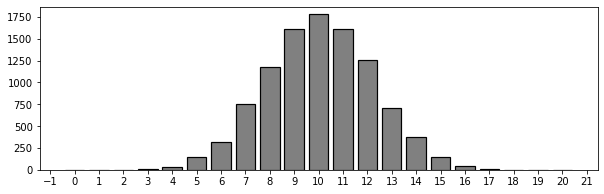

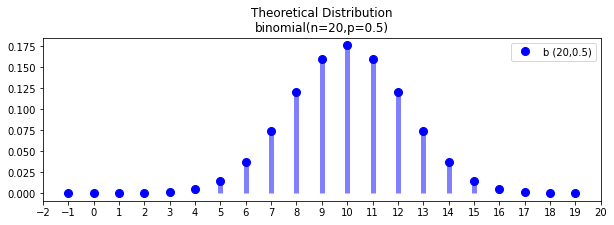

In [70]:
_ = galton_board(num_layers = 20, N = 10000, flavor=1)

经典概率解法：
$P(i) = {{ C_{L}^i } / { 2^L }}, i = \text { 0 to L } $, L 为钉板层数

# 指数分布 - 生存游戏

$X \sim E(\theta) $

PDF(概率密度函数)：

$ f(x; \theta) = \left\{
  \begin{array}{lr}
    {1 \over \theta} e ^{-x/\theta}, x>0\\
    0, else
  \end{array}
\right. $


元器件寿命为何符合指数分布？  
定义一个survival game（即每回合有p的死亡率；或电容在单位时间内被击穿的概率）的概率计算函数survival_dist。
取p = 0.001（每回合很小的死亡率），绘制出pmf曲线（离散、等比数组）

In [1]:
%run ./src/mc/experiments.py
%run ./src/mc/distributions.py

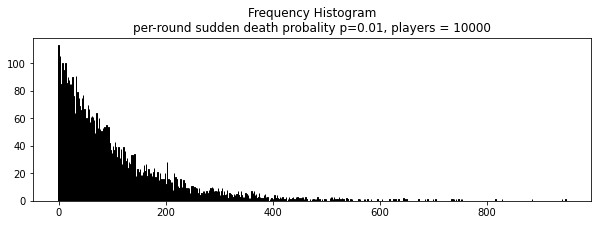

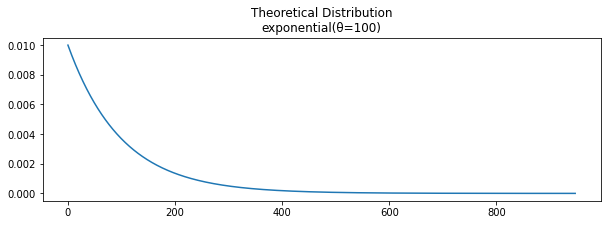

In [2]:
sudden_death(num_rounds = 1000, p = 0.01, N = 10000)

# Zipf 分布 - 曲别针实验


由哈佛大学的语言学家乔治·金斯利·齐夫（George Kingsley Zipf）于1949年发表的实验定律。它可以表述为：在自然语言的语料库里，一个单词出现的频率与它在频率表里的排名成反比。  
二八定律、长尾定理、长尾分布、帕累托分布等

回形针试验：每次随机抽取两个，连接在一起后放回

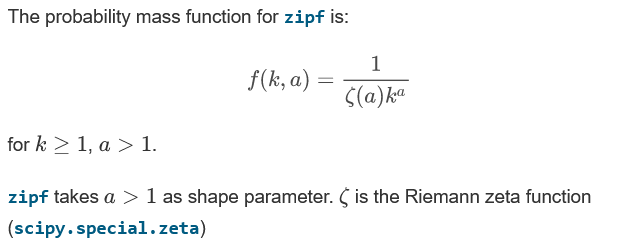

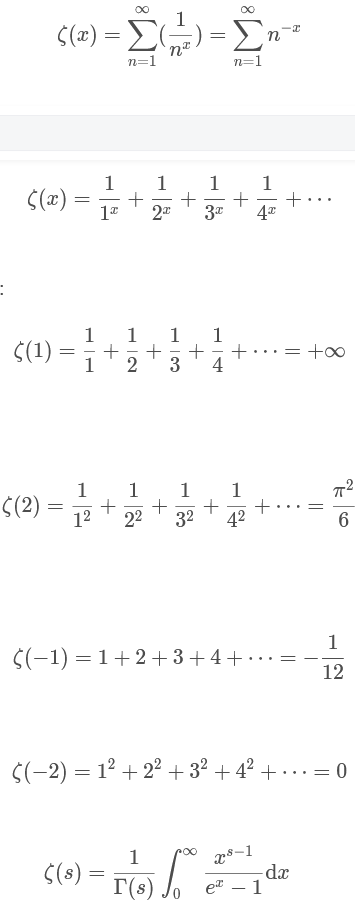

最后一个为复数域的解析延拓

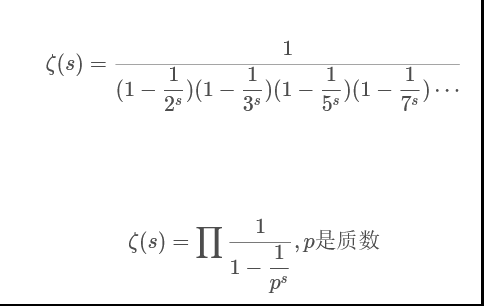

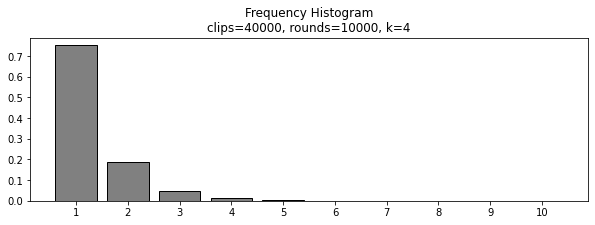

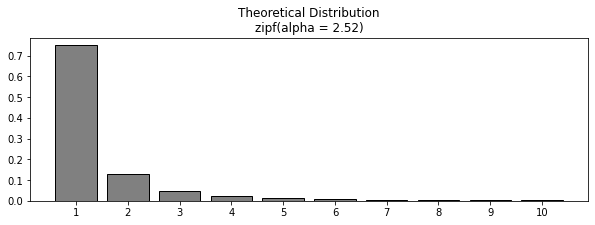

In [71]:
paper_clips(num_rounds = 10000, num_clips_k = 4)

## 三个骰子点数

投掷3个色子。得分表如下：

|  Result  |     Reward ($)     |
|----------|:-------------:|
| 456 |  16  |
| 123 |  16  |
| ooo 三个相同 |  8  |
| oox 两个相同 |  2  |
| xyz 各不相同 |  0  |

计算各情况的概率，并确定单次的票价。

In [41]:
dict_pmf = dices(N = 10000)

In [42]:
# math expectation
dict_rewards = {'ooo': 8,
 '123': 16,
 '456': 16,
 'xyz': 0,
 'oox': 2}

E = 0
for key in dict_rewards:
    E = E + dict_pmf[key] * dict_rewards[key]
E

1.9489999999999998

Math expectation = 1.94. The ticket price must > 1.94. 3 or 4 dollars is preferred.

使用 scipy multinomial 计算理论值，符合多项式分布：

In [43]:
from scipy.stats import multinomial
rv = multinomial(3, [1/6]*6)
rv.pmf([1, 1, 1, 0, 0, 0]) # 123 或 456 的情况

0.02777777777777777

# 中心极限定理 CLT

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 21241.71it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 23618.27it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 22773.46it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 17238.07it/s]


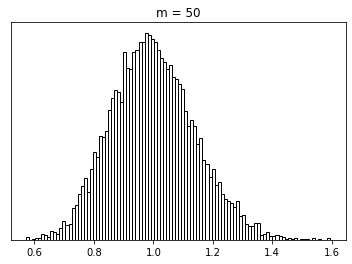

In [3]:
clt()

## 验证 Pearson's Chi-Square Goodness-of-Fit Test

皮尔逊卡方拟合优度检验有一个基本的卡方分布假设，即

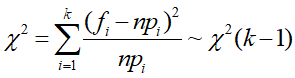 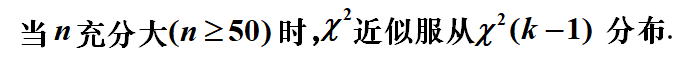

### 1. 下面用高尔顿钉板实验 b(n,p) 来验证

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 535.30it/s]


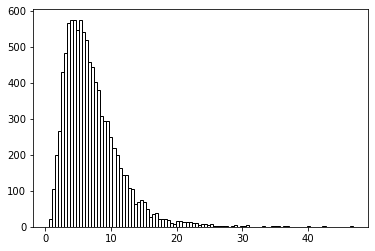

In [56]:
# test with b(n,p)

import collections
from scipy.stats import binom
from tqdm import tqdm

chisqs = []
num_rounds = 100 # 公式中n
n = 8 # num_layers，公式中 k
p = 0.5

for i in tqdm(range(10000)): # MC试验次数
    
    hist, _ = galtonBoard(num_rounds, n) # rounds, layers
    c = collections.Counter(hist)
    
    chisq = 0
    
    for j in range(n):
        pj = binom.pmf(j,n,p)
        npj = num_rounds * pj
        fj = c[j]
        # print(pj, npj, fj)
        
        chisq = chisq + (fj - npj)**2 / npj
    
    chisqs.append(chisq)

plt.hist(chisqs, density=False, bins=100, facecolor="none", edgecolor = "black")
plt.show()

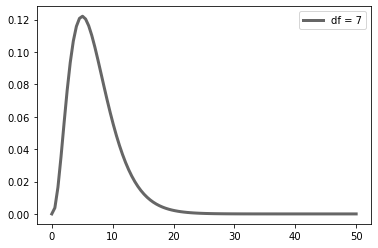

In [57]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,50,100)
k = n -1
plt.plot(x, chi2.pdf(x, df = k), lw=3, alpha=0.6, label='df = ' + str(k), c = "black")
    
plt.legend()
plt.show()

### 2. 色子实验来验证

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4828.66it/s]


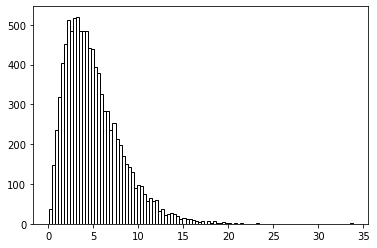

In [63]:
import collections
from scipy.stats import binom
from tqdm import tqdm
import numpy as np

chisqs = []
num_rounds = 1000 # 公式中n

for i in tqdm(range(10000)): # MC试验次数
    
    hist = np.random.randint(0, 6, num_rounds)
    c = collections.Counter(hist)
    
    chisq = 0
    
    for j in range(6):
        pj = 1.0/6
        npj = num_rounds * pj
        fj = c[j]
        # print(pj, npj, fj)
        
        chisq = chisq + (fj - npj)**2 / npj
    
    chisqs.append(chisq)

plt.hist(chisqs, density=False, bins=100, facecolor="none", edgecolor = "black")
plt.show()

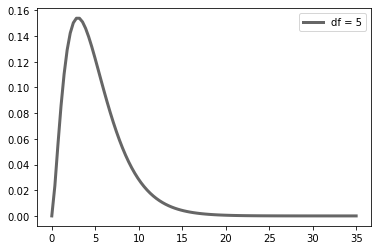

In [64]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,35,100)
k = 6 -1
plt.plot(x, chi2.pdf(x, df = k), lw=3, alpha=0.6, label='df = ' + str(k), c = "black")
    
plt.legend()
plt.show()

验证完毕，抽样分布的结果符合 Pearson's Chi-Square 的理论分布假设

## 验证 ANOVA的F分布假设

F = MSTR/MSE ~ F(k-1, n-k)

In [87]:
import collections
from scipy.stats import binom
from tqdm import tqdm
import numpy as np

FS = []
n = 100 # each class has n samples. Total sample count is kn
k = 10

for i in tqdm(range(100000)): # MC试验次数
    
    X = np.random.normal (0, 1, size=(n,k))
    SSTR = n*((X.mean(axis = 0)-X.mean())**2).sum()
    MSTR = SSTR/(k-1)
    SSE = ((X - X.mean())**2).sum()
    MSE = SSE/(k*n-k) # 此处k*n为公式中n，样本总量
    
    F = 1.0*MSTR/MSE    
    FS.append(F)

plt.hist(FS, density=False, bins=100, facecolor="none", edgecolor = "black")
plt.show()

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11430.35it/s]


In [88]:
# F distribution

import numpy
import scipy.stats
import matplotlib.pyplot as plt 
x=numpy.linspace(0,4,100)


plt.plot(x,scipy.stats.f.pdf(x,dfn=k-1,dfd=n-k))
plt.legend(['F(' + str(k-1) + ',' + str(n-k) + ')'])
plt.show()

验证完毕，抽样分布的结果符合F分布

## 中心极限定理

underlying distribution: uniform.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import collections
from scipy.stats import binom
from tqdm import tqdm
import numpy as np

for N in [1,2,5]:
    xbars = []
    for i in tqdm(range(10000)): # MC试验次数
        xbar = np.random.uniform(-1,1,N).mean()
        xbars.append(xbar)        
    plt.figure()
    plt.hist(xbars, density=False, bins=100, facecolor="none", edgecolor = "black")
    plt.title('N = ' + str(N))
    plt.yticks([])
    plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 56787.14it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 91152.78it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 70610.11it/s]


underlying distribution: exponential.

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 73736.15it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 83561.03it/s]


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 83534.73it/s]


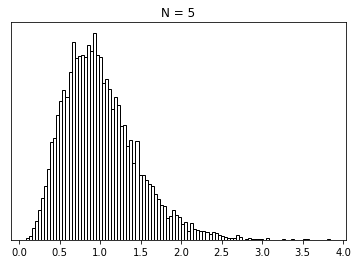

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 73725.78it/s]


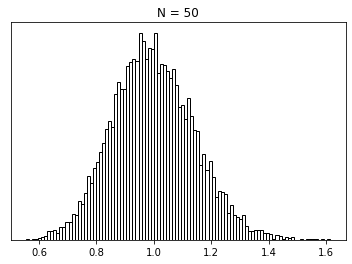

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import collections
from scipy.stats import binom
from tqdm import tqdm
import numpy as np

for N in [1,2,5,50]:
    xbars = []
    for i in tqdm(range(10000)): # MC试验次数
        xbar = np.random.exponential(scale = 1, size = N).mean()
        xbars.append(xbar)        
    plt.figure()
    plt.hist(xbars, density=False, bins=100, facecolor="none", edgecolor = "black")
    plt.title('N = ' + str(N))
    plt.yticks([])
    plt.show()

# 2. 复杂分布的抽样问题

# Markov chain Monte Carlo (MCMC)

Motivation: **从一个已知的概率分布中得到随机样本序列**

*在科学研究中，如何生成服从某个概率分布的样本是一个重要的问题。 如果样本维度很低，只有一两维，我们可以用反切法、拒绝采样和重要性采样等方法。 但是对于高维样本，这些方法就不适用了。这时我们就要使用一些 “高档” 的算法，比如下面要介绍的 Metropolis-Hasting 算法和 Gibbs sampling 算法。*

Markov chain Monte Carlo (MCMC) refers to a class of methods for sampling from a probability distribution. It works by constructing a Markov chain whose equilibrium distribution matches the distribution of interest, then sampling from the Markov chain. This is useful when one cannot directly sample from the distribution of interest, particularly in high dimensional settings. Gibbs sampling is an MCMC method.

## The Metropolis Hastings Algorithm

The Metropolis Hastings algorithm is a beautifully simple algorithm for producing samples from distributions that may otherwise be difficult to sample from.

Suppose we want to sample from a distribution π
, which we will call the “target” distribution. For simplicity we assume that π

is a one-dimensional distribution on the real line, although it is easy to extend to more than one dimension (see below).

The MH algorithm works by simulating a Markov Chain, whose stationary distribution is π
. This means that, in the long run, the samples from the Markov chain look like the samples from π. As we will see, the algorithm is incredibly simple and flexible. Its main limitation is that, for difficult problems, “in the long run” may mean after a very long time. However, for simple problems the algorithm can work well.

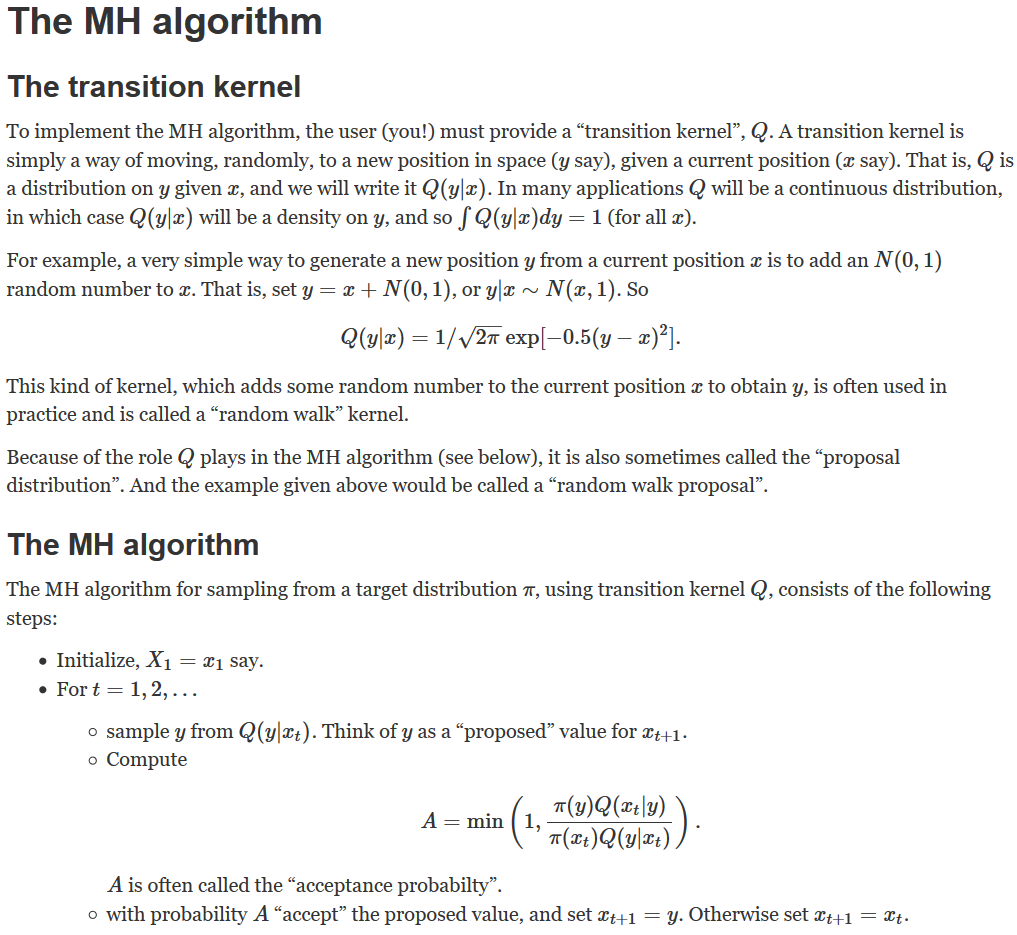

## Gibbs Sampling

 最简单的Gibbs sampling是Metropolis-Hastings算法的一个特殊情况，而Gibbs sampling的拓展则可看作是一个通用的取样体系。这个体系通过轮流对每一个（或每组）变量进行取样并结合Metropolis-Hastings算法（或者更复杂的算法，如slice sampling，adaptive rejection sampling和adaptive rejection Metropolis算法）来对大量变量进行一步或多步取样。

当联合分布未知或者难以取样，而每一个变量的条件分布则已知或者更易于取样的时候，我们就可以用Gibbs Sampling。Gibbs Sampling算法依次从每一个变量的分布中，以其他变量的当前值为条件，生成一个个体。易知，这个样本序列构成了一个Markov Chain，以及这个Markov Chain的平稳分布（stationary distribution）就是所需要的联合分布。（Gelman et al, 1995）。

<a href='gibbs_sampling.pdf' target = '_blank'>PDF</a>

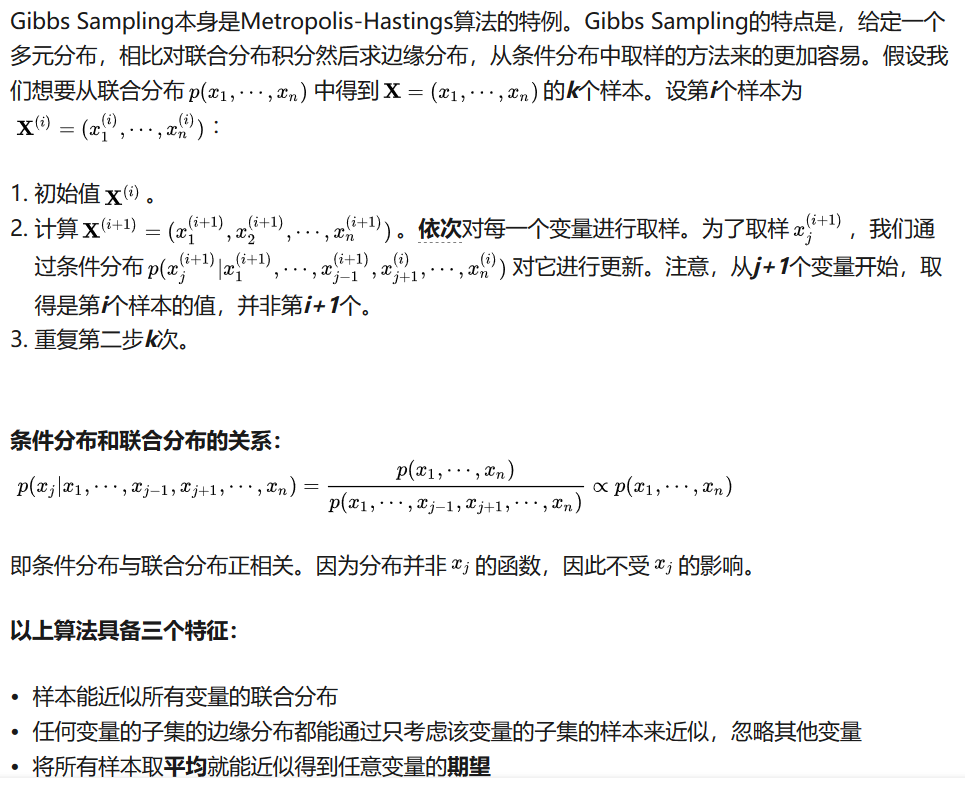

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

a = -0.5

# print a true gauss distribution
def gauss(x, y, a):
    def _gauss(x, y):
        """Multivariate normal distribution (two variables)"""
        mu = np.array([0, 0])
        sigma = (1 - a*a) * np.array([[1 , a],
                                      [a,  1]])
        det = np.linalg.det(sigma)
        inv_sigma = np.linalg.inv(sigma)

        x_c = np.array([x, y]) - mu
        return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T)/2.0) / (2*np.pi*np.sqrt(det))
    
    z = np.vectorize(_gauss)(x, y)
    return z

def plot_gauss():
    t = np.arange(-5, 5, 0.1)
    X, Y =np.meshgrid(t, t)
    Z = gauss(X, Y, a)

    plt.title('True Distribution(a={})'.format(a))
    c = plt.contour(X, Y, Z)
    c.clabel(fmt='%1.2f', fontsize=10)

plot_gauss()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


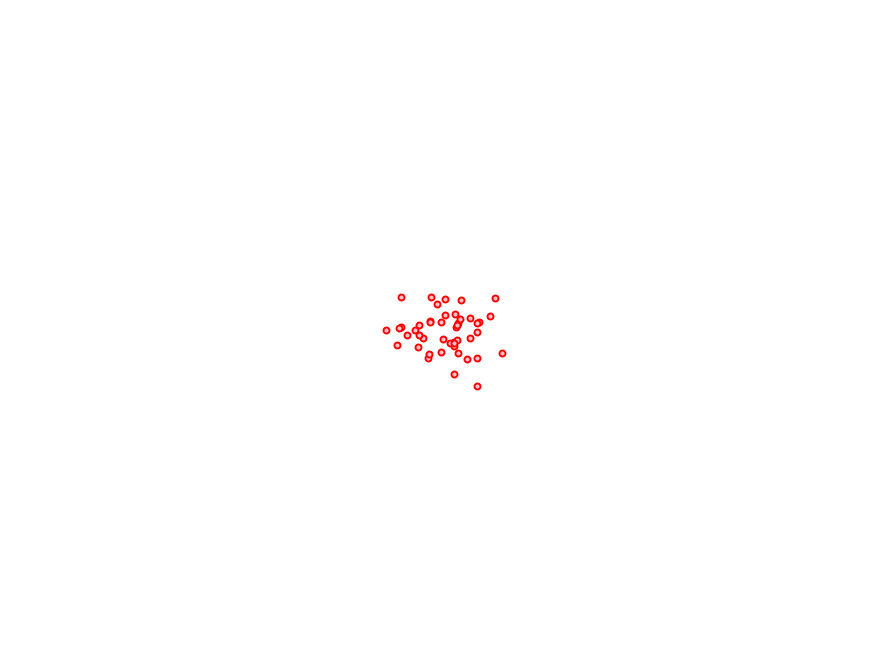

In [2]:
# try gibbs sampling
def gibbs_sampling(a, step, burn_in):
    x = np.zeros(2) # initial x
    samples = np.array(x)
    for i in range(step):
        denomi = 1 / np.sqrt(2*np.pi)
        x[0] = denomi * np.random.normal(a*x[1], 1) # mu=ax[1], sigma=1
        samples = np.append(samples, (x))
        x[1] = denomi * np.random.normal(a*x[0], 1)
        samples = np.append(samples, (x))
    print(x.shape)
    print((x).shape)
    print(samples.shape)
    samples = samples.reshape((2*step+1, x.shape[0])) # +1 means initial x
    print(samples.shape)
    
    return samples


def onetime_gibbs_sampling(_):
    denomi = 1 / np.sqrt(2*np.pi)
    x[0] = denomi * np.random.normal(a*x[1], 1) # mu=ax[1], sigma=1
    x[1] = denomi * np.random.normal(a*x[0], 1)
    
    plt.scatter(x[0], x[1], s=10, c='pink', edgecolor='red')
    plt.ylim(-5,5)
    plt.xlim(-5,5)

anim_plot = True
if anim_plot:
    fig = plt.figure()
    x = np.zeros(2)
    ani = animation.FuncAnimation(fig, onetime_gibbs_sampling, interval=10, blit=True)
else:
    step = 3000
    burn_in = 100
    samples = gibbs_sampling(a, step, burn_in)
    plt.scatter(samples[burn_in:, 0], samples[burn_in:, 1], s=10, c='pink', alpha=0.2, edgecolor='red')

# ani.save('gibbs_sampling.gif', writer='imagemagick')
plot_gauss()
plt.show()